# Install required packages

Installs the package which is essential for working with Google's generative AI models in Python.

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 2.5 MB/s eta 0:00:00


Imports necessary libraries:

pathlib: Provides functions for working with file paths in a platform-independent way.

textwrap: Offers tools for wrapping and formatting text to improve readability.

google.generativeai as genai: Imports the Google AI Python SDK, enabling interaction with Google's generative AI models.

google.colab.userdata: Specifically for Google Colab environments, securely stores API keys.

IPython.display: Contains functions for displaying various content types in Jupyter notebooks or Colab.


In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Use the secrets icon on the left pane to securedly store your API key. You can get the key for free with one click from https://makersuite.google.com/app/apikey

In [4]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('APIK')

genai.configure(api_key=GOOGLE_API_KEY)

Lets list all models available. "generateContent" helps filter multimodal models.

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [6]:
for m in genai.list_models():

  print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


#Text to Text Generation

Lets call Gemini API and generate text from text inputs

In [28]:
model = genai.GenerativeModel('gemini-pro')



In [29]:
%%time
response = model.generate_content("Come up with suggestions for names of an AI product whic accelerates development of Gen AI applications")

CPU times: user 94.4 ms, sys: 15.3 ms, total: 110 ms
Wall time: 7.24 s


In [30]:
to_markdown(response.text)

> - **AI Catalyst**: This name evokes the idea that the AI product is a catalyst that speeds up the development of Gen AI applications.
> 
> - **Fusion AI**: This name conveys the idea that the AI product combines different technologies to create a powerful tool for Gen AI application development
> 
> - **Nebula AI**: This name conjures up an image of a vast, interconnected network of AI resources that developers can tap into.
> 
> - **Quasar AI**: This name suggests that the AI product is a powerful and concentrated source of intelligence that can be used to power Gen AI applications.
> 
> - **Pyxis AI**: This name refers to the mariner's compass, emphasizing the AI product's role as a guiding tool for Gen AI application developers.
> 
> - **Beacon AI**: Similar to Pyxis AI, this name signifies the AI product as a guiding light for developers in the often-complex landscape of Gen AI application development.
> 
> - **Aurora AI**: This name symbolizes the dawn of a new era in AI application development, where the AI product acts as the first light of a new day.
> 
> - **Genesis AI**: This name alludes to the origin and beginning of Gen AI, positioning the AI product as a fundamental tool for building the next generation of AI applications.
> 
> - **Astrum AI**: Latin for "star," this name implies that the AI product is a celestial beacon illuminating the path toward innovative Gen AI applications.
> 
> - **Apex AI**: This name denotes the AI product's position at the pinnacle of Gen AI application development, suggesting superiority and cutting-edge capabilities.

In [31]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

# Multimodal with image inputs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49212  100 49212    0     0   293k      0 --:--:-- --:--:-- --:--:--  294k


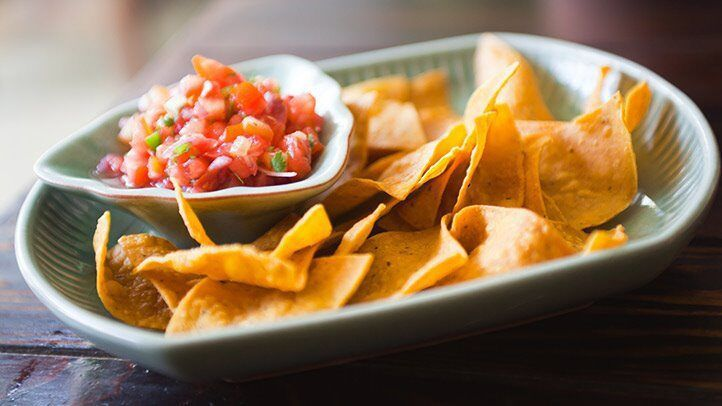

In [23]:
!curl -o image.jpg https://images.everydayhealth.com/images/diet-nutrition/healthy-snack-ideas-that-are-under-200-calories-04-722x406.jpg?w=768
import PIL.Image

img = PIL.Image.open('image.jpg')
img

When needing to provide both text and images in the prompt , provide it as a python list as shown below. The list can contain text and images

In [33]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(["Provide nutritional information and estimated calorie count. Also state a description of the food you see", img], stream=True)
response.resolve()

In [34]:
to_markdown(response.text)

>  **Nutrition Facts**
> 
> * Calories: 150
> * Fat: 10g
> * Carbohydrates: 15g
> * Protein: 2g
> 
> **Description**
> 
> This is a plate of tortilla chips and salsa. The chips are made from corn and are fried. The salsa is made from tomatoes, onions, and cilantro.